<a href="https://colab.research.google.com/github/LAHYANIOmar/Data-analysis/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Data Analysis - Final Project : Exploring Stock Market Clustering and Dimensionality Reduction Techniques**

**Introduction**
    

The project aims to explore and analyze financial markets data using clustering and dimensionality reduction techniques. By leveraging daily returns and other relevant financial variables, we aim to identify patterns and groups of stocks that exhibit similar behaviors. This analysis can provide valuable insights into the relationships and dynamics of the financial markets, enabling informed decision-making for investors and financial professionals.

In today's complex and dynamic financial landscape, understanding the behavior of stocks and their interactions is crucial. Clustering techniques allow us to group stocks based on their similarity, helping us identify sectors or market segments that move in sync or exhibit shared characteristics. On the other hand, dimensionality reduction techniques allow us to reduce the complexity of the data while preserving its essential information, enabling us to extract key features and identify the factors that drive the variability in stock behavior.

The project will be divided into 6 keys parts:
* Data loading
* Data preprocessing
* Data Exploration and visualization
* Clustering Techniques
* Dimensionality reduction techniques
* Results evaluation
* conclusions

**Data loading**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import yfinance as yf
# Download the list of S&P 500 tickers from Wikipedia
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_table = pd.read_html(sp500_url)[0]
sp500_tickers = sp500_table['Symbol'].tolist()

# Define the start and end dates for the data
start_date = '2016-01-01'
end_date = '2022-12-31'

#download prices data
data = yf.download(sp500_tickers, start=start_date, end=end_date)

# Keep only the 'Close' prices for each stock
prices = data['Close']

# Calculate daily returns for each stock
returns = prices.pct_change()

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


In [ ]:
returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05 00:00:00,-0.003441,-0.009533,-0.006831,-0.025059,-0.004166,0.014626,-0.000233,0.003631,0.005205,0.004023,...,0.018904,0.010084,0.008521,0.020387,-0.000277,-0.002493,0.020823,-0.025117,-0.010857,0.015655
2016-01-06 00:00:00,0.004439,0.017522,-0.026455,-0.019570,0.000174,-0.015286,-0.008388,0.001592,-0.001954,-0.014295,...,-0.051805,0.010538,-0.008321,-0.014486,-0.012476,-0.007080,0.004330,-0.039957,-0.029145,0.000208
2016-01-07 00:00:00,-0.042475,-0.018918,0.011073,-0.042205,-0.002963,-0.031932,-0.023966,-0.001011,-0.029366,-0.020984,...,-0.094070,0.003842,-0.016006,-0.008785,-0.025828,-0.034116,-0.022993,-0.045316,-0.030020,-0.030404
2016-01-08 00:00:00,-0.010513,-0.001978,-0.021971,0.005288,-0.027268,-0.005785,-0.020944,-0.010414,-0.009681,-0.014140,...,-0.040704,-0.010935,-0.020202,-0.028635,-0.009510,-0.013607,-0.004217,-0.002693,-0.011254,-0.014605


**Data Preprocessing**

<Axes: >

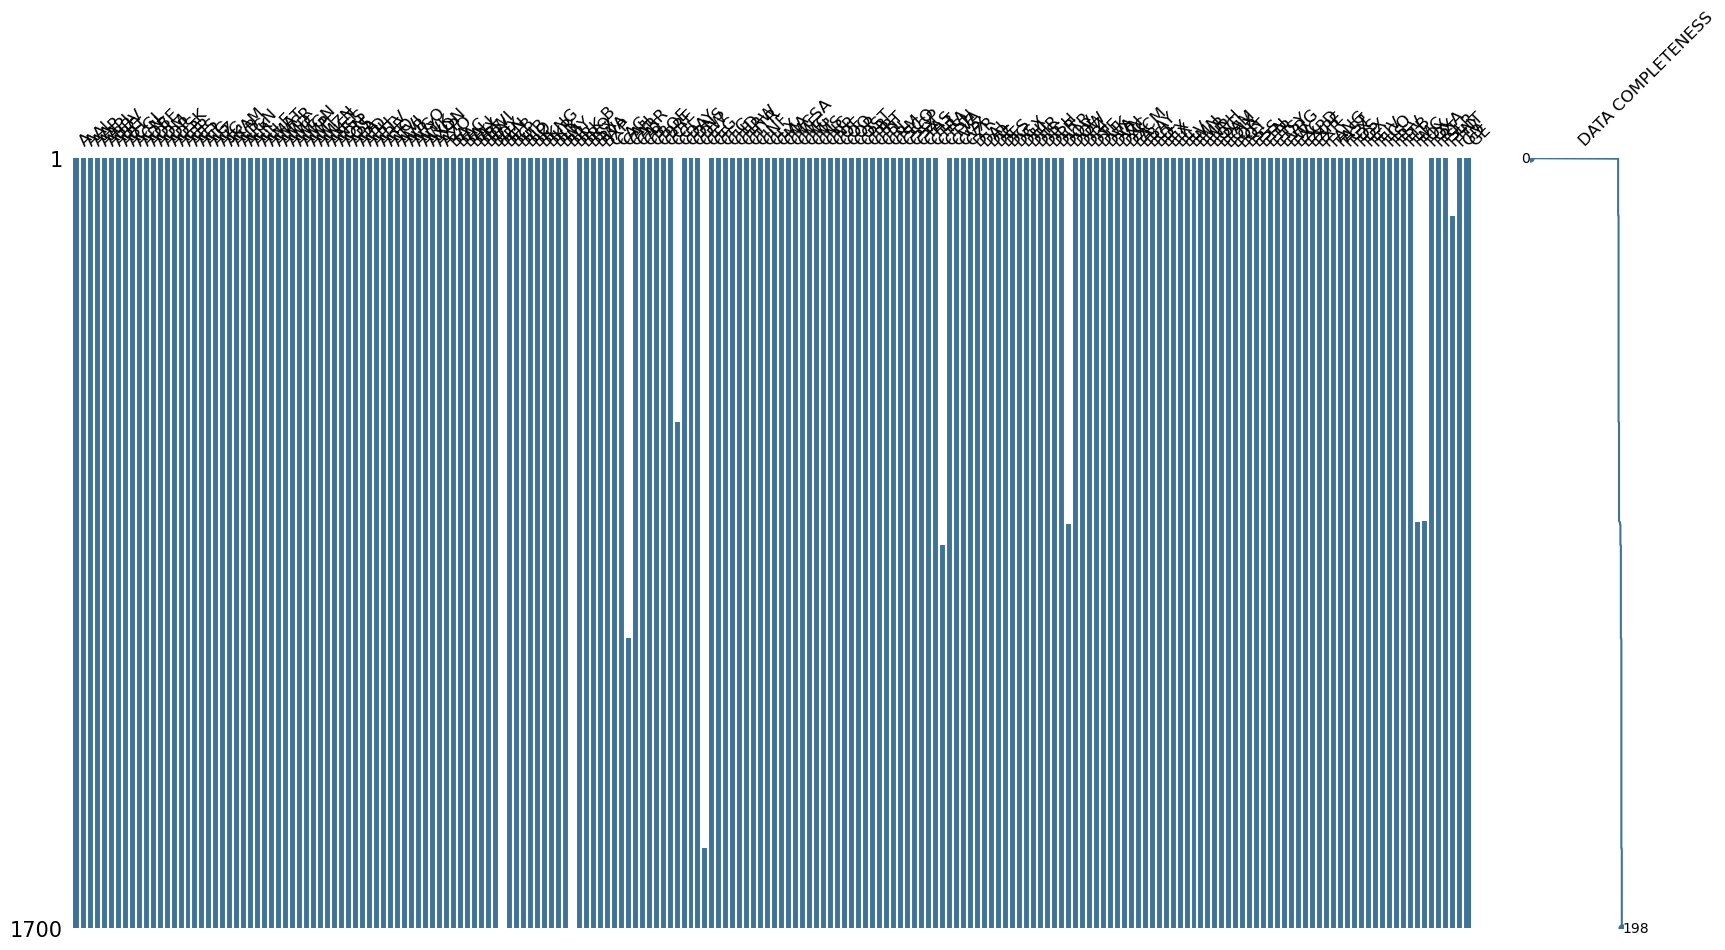

In [ ]:
import missingno as msno
msno.matrix(returns.iloc[0:1700, 0:200], sparkline=True, figsize=(20,10), sort='ascending', fontsize=12, labels=True, color=(0.25, 0.45, 0.6))

Key insights:

there are some companies that pratically dont have any values in the dataset, and other which have alot of missing values.
The missing values of a given company are present for a continous period, that period starts in the beginning of the dataset.
Based on these insights, certain missing values processing techniques such as forward fill, statistical techniques such as moving average which uses the past values and some interpolation techniques which also use past values can not be used.So we have limited options of dealing with these missing values

In [ ]:
import numpy as np
x = returns.to_numpy()
print(np.isnan(x).sum())

16516


In [ ]:
returns = returns.bfill()

In [ ]:
returns  = returns.dropna(axis=1)

In [ ]:
returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05 00:00:00,-0.003441,-0.009533,-0.006831,-0.025059,-0.004166,0.014626,-0.000233,0.003631,0.005205,0.004023,...,0.018904,0.010084,0.008521,0.020387,-0.000277,-0.002493,0.020823,-0.025117,-0.010857,0.015655
2016-01-06 00:00:00,0.004439,0.017522,-0.026455,-0.019570,0.000174,-0.015286,-0.008388,0.001592,-0.001954,-0.014295,...,-0.051805,0.010538,-0.008321,-0.014486,-0.012476,-0.007080,0.004330,-0.039957,-0.029145,0.000208
2016-01-07 00:00:00,-0.042475,-0.018918,0.011073,-0.042205,-0.002963,-0.031932,-0.023966,-0.001011,-0.029366,-0.020984,...,-0.094070,0.003842,-0.016006,-0.008785,-0.025828,-0.034116,-0.022993,-0.045316,-0.030020,-0.030404
2016-01-08 00:00:00,-0.010513,-0.001978,-0.021971,0.005288,-0.027268,-0.005785,-0.020944,-0.010414,-0.009681,-0.014140,...,-0.040704,-0.010935,-0.020202,-0.028635,-0.009510,-0.013607,-0.004217,-0.002693,-0.011254,-0.014605
2016-01-11 00:00:00,-0.016844,0.017587,0.010236,0.016192,-0.031806,-0.039812,0.001475,-0.002046,0.010489,0.017416,...,-0.016453,0.008016,-0.013389,-0.019477,-0.008438,-0.001761,-0.017233,-0.006582,-0.019919,-0.028335


In [ ]:
stocks = returns.columns

<Axes: >

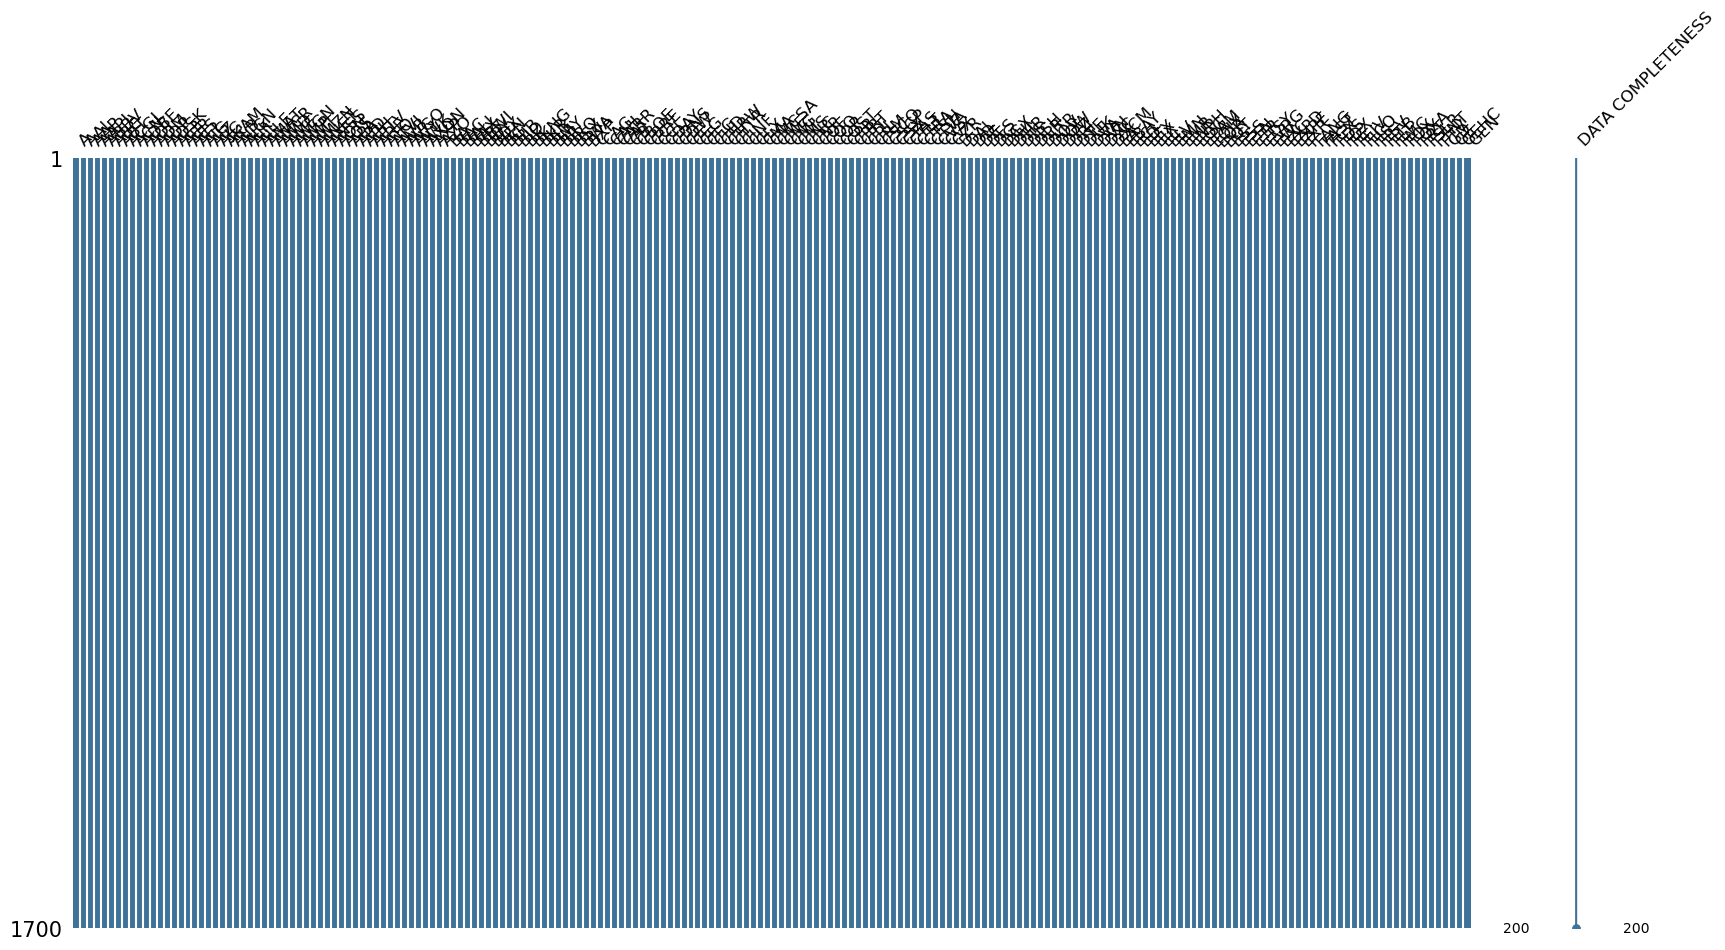

In [ ]:
msno.matrix(returns.iloc[0:1700, 0:200], sparkline=True, figsize=(20,10), sort='ascending', fontsize=12, labels=True, color=(0.25, 0.45, 0.6))

As is shown in the graph, there are no missing values remaining.

**Data Exploration and Visualization**

In [ ]:
import matplotlib.pyplot as plt
import tqdm as tqdm

In [ ]:
returns.describe(include='all')

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,...,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000
mean,0.000886,-0.000074,0.000217,0.001090,0.000734,0.000448,0.000657,0.000735,0.000680,0.000967,...,0.000652,0.000480,0.000378,-0.000153,0.000797,0.000627,0.000316,0.001082,0.000604,0.000775
std,0.017092,0.034722,0.021624,0.019150,0.017139,0.018515,0.015715,0.018035,0.016308,0.021426,...,0.033167,0.013835,0.018858,0.019756,0.017916,0.015233,0.018509,0.025085,0.022782,0.016253
min,-0.110117,-0.252246,-0.203439,-0.128647,-0.162524,-0.130314,-0.097857,-0.168752,-0.083899,-0.167932,...,-0.244346,-0.126918,-0.122248,-0.186416,-0.120273,-0.109992,-0.139943,-0.177693,-0.120465,-0.146956
25%,-0.007121,-0.015685,-0.009392,-0.007564,-0.007160,-0.008897,-0.006214,-0.006463,-0.006387,-0.007483,...,-0.014833,-0.005867,-0.008484,-0.008608,-0.007486,-0.005682,-0.007710,-0.010606,-0.011605,-0.006750
50%,0.001428,-0.000563,0.000263,0.000893,0.001234,0.000918,0.000980,0.001076,0.001374,0.001563,...,-0.000318,0.000796,0.000256,0.000629,0.000772,0.000715,0.000173,0.001109,0.000902,0.001041
75%,0.009754,0.015439,0.010901,0.010511,0.008561,0.009976,0.008981,0.008134,0.008204,0.011068,...,0.015491,0.007315,0.009168,0.009215,0.009524,0.007150,0.008824,0.012711,0.012124,0.009068
max,0.098394,0.410970,0.163345,0.119808,0.137673,0.118151,0.109360,0.153577,0.128573,0.177193,...,0.276883,0.112577,0.126868,0.176485,0.112620,0.232484,0.155797,0.172142,0.238811,0.119793


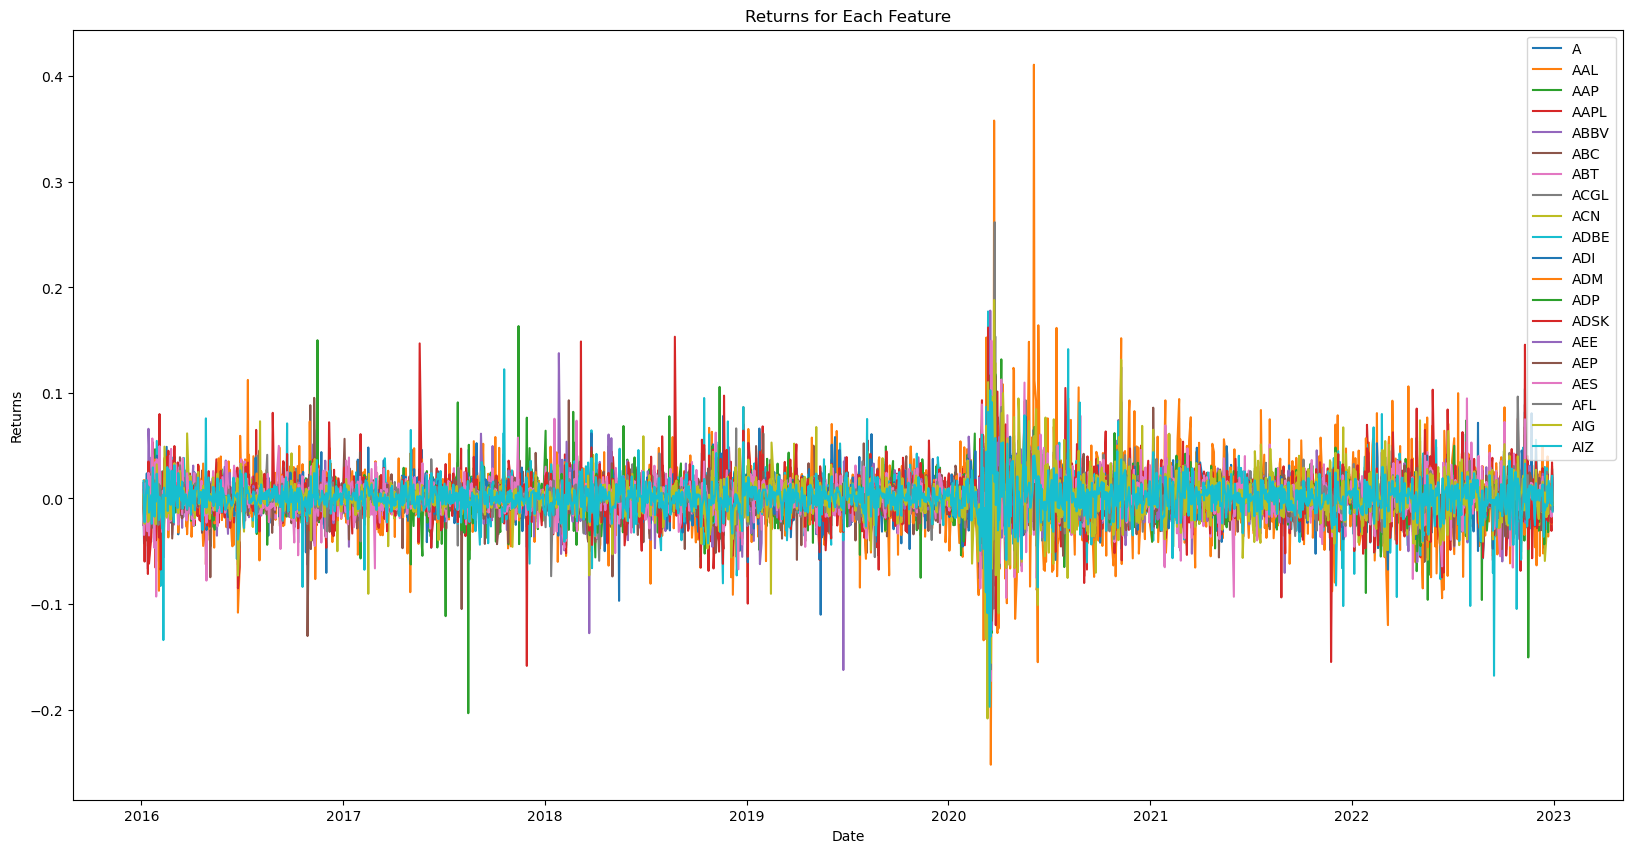

In [ ]:
plt.figure(figsize=(20, 10))

for col in returns.columns.tolist()[:20]:
    plt.plot(returns.index, returns[col], label=col)

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Returns for Each Feature')
plt.legend()
plt.show()

**Clustering Techniques**

**K-Means**

K-means is a popular clustering algorithm used in this project to group stocks based on their similarity in terms of daily returns or other financial variables. The algorithm aims to partition the dataset into a predetermined number of clusters, with each cluster represented by its centroid (mean).

![](https://res.cloudinary.com/dyd911kmh/image/upload/v1678462092/image7_a1777d39aa.png)

By applying the K-means algorithm to financial market data, we can identify groups of stocks that exhibit similar behaviors, potentially indicating shared characteristics or industry-specific patterns.

In [ ]:
from sklearn.cluster import KMeans

k=3

kmeans = KMeans(n_clusters=k, random_state=42)
clustersk = kmeans.fit_predict(returns.T)

In [ ]:
clusters

array([2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 0,
       0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1,
       1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1,
       2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0,
       1, 1, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 2, 1,

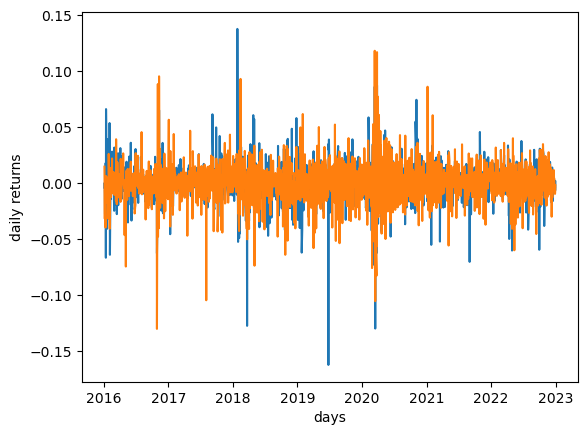

In [ ]:
plt.plot(returns[stocks[4]])
plt.plot(returns[stocks[5]])
plt.xlabel("days")
plt.ylabel("daily returns")
plt.show()

**Gaussian Mixture Model clustering**

Gaussian Mixture Models (GMM) is a probabilistic model used in this project to identify underlying patterns and clusters within financial market data. It assumes that the data points are generated from a mixture of Gaussian distributions, where each Gaussian distribution represents a distinct cluster.

![](https://vitalflux.com/wp-content/uploads/2021/09/gaussian-mixture-models-1-640x343.png)

The application of GMM in this project allows us to identify clusters of stocks that exhibit similar behaviors, capturing hidden patterns and relationships in the market. These insights can be valuable for portfolio management, risk assessment, and decision-making, enabling investors and financial professionals to better understand and navigate the dynamics of the financial markets.

In [ ]:
from sklearn.mixture import GaussianMixture

k = 3

gmm = GaussianMixture(n_components=k)

# Fit the GMM to the data
gmm.fit(returns.T)

# Predict the cluster labels
clusters = gmm.predict(returns.T)

In [ ]:
clusters

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0,
       2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0,

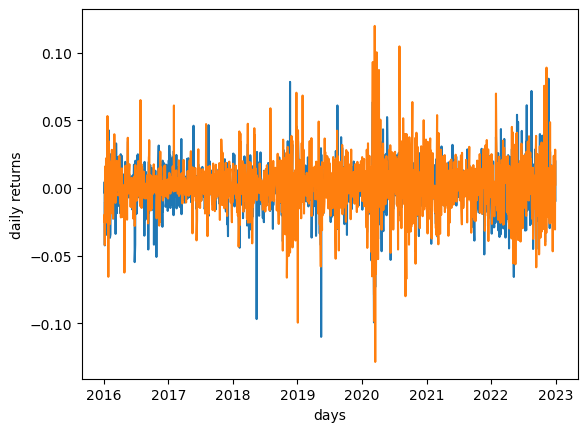

In [ ]:
plt.plot(returns[stocks[0]])
plt.plot(returns[stocks[3]])
plt.xlabel("days")
plt.ylabel("daily returns")
plt.show()

**Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is a dimensionality reduction technique used in this project to extract the most important features or components from financial market data. It aims to transform a high-dimensional dataset into a lower-dimensional representation while retaining the maximum amount of information.

![](https://blog.bioturing.com/wp-content/uploads/2018/11/Blog_pca_6b.png)

The application of PCA can facilitate decision-making processes, risk assessment, and portfolio optimization by providing a more concise representation of the data while retaining its crucial characteristics.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(returns.T)

#print the number of components
print(f"Number of components : {pca.n_components_} components.")


Number of components : 220 components.


In [ ]:
df_pca = pd.DataFrame(X_pca, columns=['Component {}'.format(i+1) for i in range(pca.n_components_)])
df_pca.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,...,Component 211,Component 212,Component 213,Component 214,Component 215,Component 216,Component 217,Component 218,Component 219,Component 220
0,-0.150381,0.110724,-0.117265,0.064942,-0.062312,-0.052092,-0.025236,0.008977,0.078258,-0.015925,...,-0.017142,0.003013,0.016203,0.025794,-0.011387,0.016982,0.000629,0.014989,0.027843,0.009297
1,0.614805,0.034920,-0.027296,-0.440574,-0.071406,-0.313369,0.417582,-0.105530,-0.029517,0.017775,...,-0.004860,0.040972,-0.034827,-0.022735,-0.030961,0.017192,0.009826,-0.009145,-0.009577,-0.012501
2,-0.066623,-0.068736,0.024866,-0.093861,-0.050794,0.091384,0.072285,0.163690,-0.094781,-0.025308,...,0.028634,0.023669,0.036072,0.078688,-0.051682,-0.025345,-0.034076,-0.042613,0.036994,-0.000945
3,-0.135646,0.184938,-0.176600,0.066733,-0.000278,-0.055106,-0.002641,-0.077616,-0.041390,-0.004873,...,-0.013866,-0.015933,-0.000735,0.008172,0.006540,-0.015014,0.007838,0.027501,0.010860,-0.009432
4,-0.198188,-0.071625,0.033065,0.110930,-0.036626,-0.116802,-0.036914,0.103260,0.056192,0.116589,...,-0.057946,0.026837,-0.015546,-0.017631,-0.022052,0.018826,-0.019435,0.004105,0.008525,-0.030914


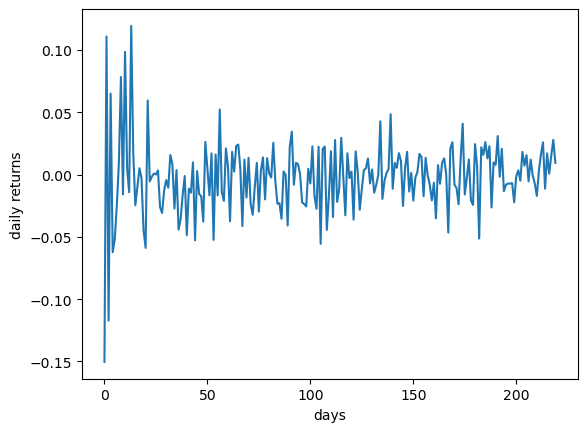

In [ ]:
plt.plot(range(220), df_pca.iloc[0])
plt.xlabel("days")
plt.ylabel("daily returns")
plt.show()

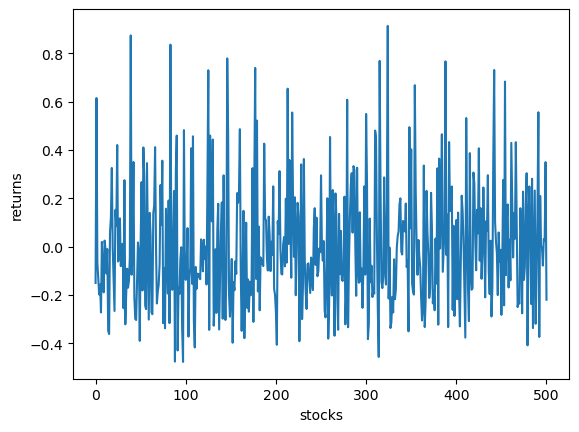

In [ ]:
plt.plot(range(501), df_pca["Component 1"])
plt.xlabel("stocks")
plt.ylabel("returns")
plt.show()

**Linear Discriminant Analysis (LDA)**

Linear Discriminant Analysis (LDA) is a dimensionality reduction technique used in this project to transform high-dimensional financial market data into a lower-dimensional space while maximizing class separability. Unlike PCA, which focuses on capturing the overall variance in the data, LDA aims to find a subspace that maximizes the separation between different classes or categories.

![](https://www.researchgate.net/profile/Gregory-Richards-2/publication/288002528/figure/fig5/AS:318622703603716@1452976980713/Linear-discriminant-analysis.png)

The application of LDA can have several benefits, such as improved classification accuracy, better visualization of class separability, and identification of key factors driving differences between groups of stocks. This can assist in building predictive models, risk assessment, and decision-making processes in the financial domain.

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_components = 100
svd = TruncatedSVD(n_components)
X_lda = svd.fit_transform(returns.T)
df_lda = pd.DataFrame(X_lda, columns=['Component {}'.format(i+1) for i in range(n_components)])
df_lda.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,...,Component 91,Component 92,Component 93,Component 94,Component 95,Component 96,Component 97,Component 98,Component 99,Component 100
0,0.488396,0.237012,-0.063179,0.027419,0.076318,-0.058078,-0.064131,0.003194,0.081158,-0.000286,...,0.009371,-0.031945,-0.005277,-0.020592,-0.013514,-0.011037,0.001810,-0.008127,-0.021597,0.043457
1,0.881608,-0.369492,0.063160,0.196198,-0.525426,-0.106009,-0.104802,0.386201,0.066752,-0.235500,...,0.061532,-0.024859,-0.027297,0.000948,-0.030575,-0.045548,-0.007812,0.028491,0.024422,0.004138
2,0.471782,0.036360,-0.036995,-0.125319,-0.068164,-0.050352,0.127536,-0.097141,-0.011090,-0.158709,...,-0.012508,-0.019586,0.000299,-0.085245,-0.036099,0.023831,0.061308,0.025894,0.003577,-0.001980
3,0.522474,0.285414,-0.068482,0.104552,0.062341,0.001700,-0.059985,0.066951,-0.055200,-0.003445,...,0.021365,-0.043778,-0.009246,-0.005107,0.006079,-0.007024,0.010920,0.021833,-0.011399,0.040196
4,0.325313,0.085893,-0.032732,-0.086395,0.122918,-0.034037,-0.111722,-0.074059,0.086656,-0.013801,...,-0.052060,0.073099,-0.008625,0.018899,0.033586,-0.009497,0.035402,-0.001140,0.059835,0.025165


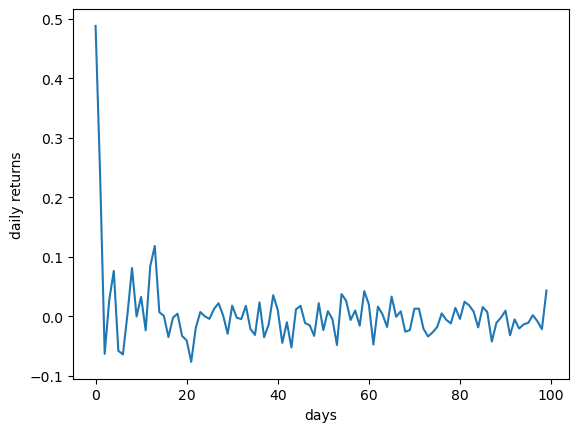

In [ ]:
plt.plot(range(100), df_lda.iloc[0])
plt.xlabel("days")
plt.ylabel("daily returns")
plt.show()

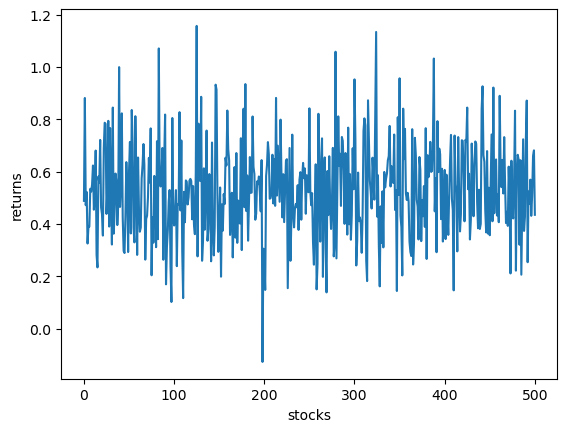

In [ ]:
plt.plot(range(501), df_lda["Component 1"])
plt.xlabel("stocks")
plt.ylabel("returns")
plt.show()

For LDA, we conclude that the different classes are not linearly separable, for each of the clustering techniques, we can see that the cluster regions intersect.

**Factor Analysis**


Factor Analysis is a dimensionality reduction technique used in this project to uncover underlying latent factors or variables that explain the observed correlations in financial market data. It aims to identify a smaller number of unobservable factors that are responsible for the patterns and relationships observed in the original dataset.

![](https://i.stack.imgur.com/3BBSd.png)

The application of Factor Analysis can provide insights into the key factors influencing stock returns, portfolio construction, risk management, and other financial decision-making processes. By understanding the underlying factors, investors and analysts can gain a deeper understanding of the dynamics and drivers of the financial markets.

In [ ]:
from sklearn.decomposition import FactorAnalysis
n_factors = 100
fa = FactorAnalysis(n_components=n_factors)
X_fa = fa.fit_transform(returns.T)
df_fa = pd.DataFrame(X_fa, columns=['Factor {}'.format(i+1) for i in range(n_factors)])
df_fa.head()

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,Factor 10,...,Factor 91,Factor 92,Factor 93,Factor 94,Factor 95,Factor 96,Factor 97,Factor 98,Factor 99,Factor 100
0,0.278670,0.227142,0.978113,0.344576,-0.791697,-0.054714,0.597588,0.150529,-0.581296,1.076110,...,-1.047360,0.011447,0.702644,0.954926,0.113327,0.146263,-0.090807,0.816687,0.047752,-0.143017
1,-1.357906,-1.807451,0.091030,-3.345617,2.422170,-0.548165,0.865104,-0.790039,1.738374,0.652938,...,-1.320532,0.565237,-0.020284,0.054404,0.261016,-0.446953,0.497455,0.139861,-1.054141,0.113385
2,-0.056111,0.314275,-0.427288,-0.584281,-0.583002,0.677702,-0.099703,2.788117,1.000423,-0.176825,...,-0.014521,-0.883581,-0.614339,3.354775,0.807898,-1.933803,0.558427,-1.228265,-0.189601,-0.087173
3,0.339339,0.058212,1.328373,0.477246,-0.107699,-0.539083,-0.353296,-0.575742,0.374932,-0.658287,...,0.356943,0.300583,-1.758383,-0.074054,-0.566478,1.250574,-1.655677,-1.071751,1.712780,-0.958211
4,0.329070,0.711822,-0.185934,0.583502,-1.028249,-0.272069,1.507960,-0.475173,1.303811,0.817773,...,1.466193,0.631921,-0.006098,-0.188912,0.026189,-1.241736,-1.362065,-0.782252,-0.029344,-0.514238


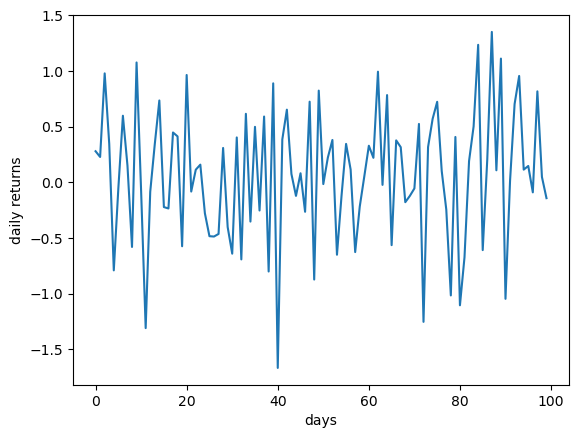

In [ ]:
plt.plot(range(100), df_fa.iloc[0])
plt.xlabel("days")
plt.ylabel("daily returns")
plt.show()

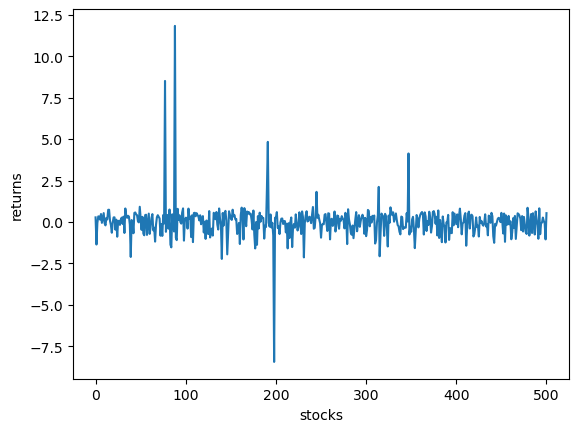

In [ ]:
plt.plot(range(501), df_fa["Factor 1"])
plt.xlabel("stocks")
plt.ylabel("returns")
plt.show()

**Evaluating the Results**

For PCA

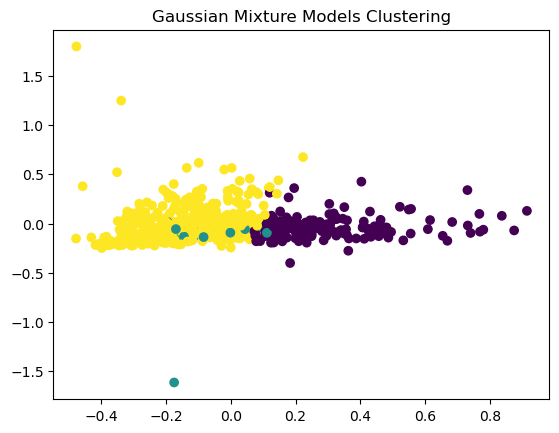

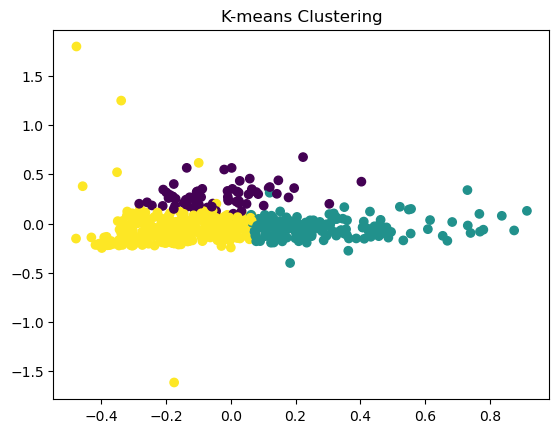

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:,1], c=clusters)
plt.title('Gaussian Mixture Models Clustering')
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:,1], c=clustersk)
plt.title('K-means Clustering')
plt.show()

We can see that PCA is able to  distinguish between the clusters for both gaussian mixture models and k-means.

For Factor Analysis

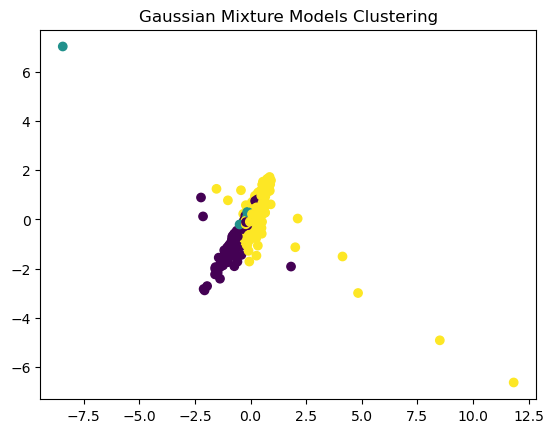

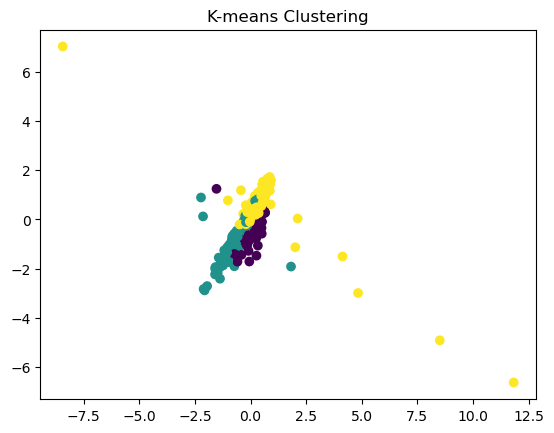

In [ ]:
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=clusters)
plt.title('Gaussian Mixture Models Clustering')
plt.show()

plt.scatter(X_fa[:, 0], X_fa[:, 1], c=clustersk)
plt.title('K-means Clustering')
plt.show()

Factor analysis is not able to distinguish between the clusters, however they are not  PCA. This can be due to the fact that factor analysis requires a list of assumptions that are not necessarily met in the dataset.

For LDA

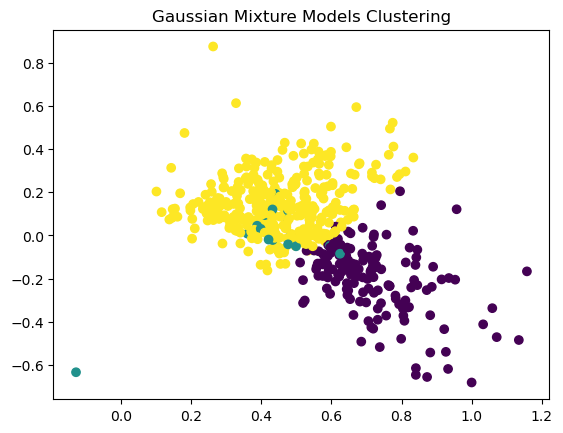

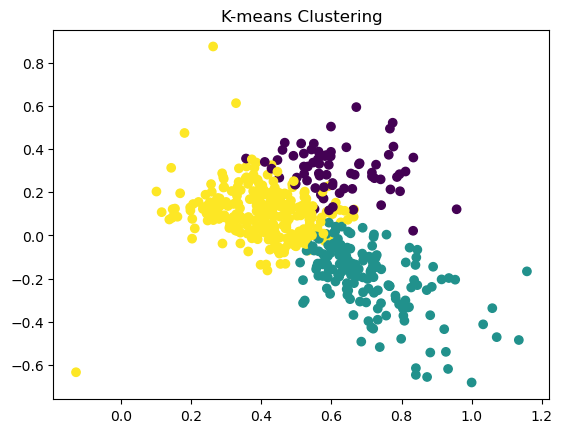

In [ ]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=clusters)
plt.title('Gaussian Mixture Models Clustering')
plt.show()

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=clustersk)
plt.title('K-means Clustering')
plt.show()

We can see that LDA is able to  distinguish between the clusters for  k-means.but for Gaussian Mixture Models, we can see that the cluster regions intersect.

**Conclusion**

In conclusion, this project focused on the exploration and analysis of financial market data using clustering and dimensionality reduction techniques. Through the utilization of techniques such as K-means clustering, Gaussian Mixture Models, Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), and Factor Analysis, we aimed to uncover patterns, groups, and underlying factors within the data.

By collecting suitable financial market data, either from publicly available sources or pre-built datasets, we obtained a comprehensive understanding of stock behaviors and relationships. Preprocessing steps were applied to clean and prepare the data, ensuring its quality and suitability for analysis.

The application of clustering techniques allowed us to identify groups of stocks that exhibited similar behaviors, aiding in portfolio diversification and risk assessment. By using techniques such as K-means clustering and Gaussian Mixture Models, we were able to discover clusters based on similarities in daily returns or other financial variables.

Dimensionality reduction techniques, including PCA, LDA, and Factor Analysis, enabled us to reduce the dimensionality of the dataset while capturing the most important features and underlying factors. These techniques provided a more concise representation of the data, facilitating visualization, interpretation, and decision-making processes.